In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from termcolor import colored

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("../content/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Menampilkan dimensi Dataset

In [ ]:
print(colored("There are {} rows and {} columns in the dataset.".format(df.shape[0],df.shape[1]),attrs=['bold']))

There are 6234 rows and 12 columns in the dataset.


Menampilkan daftar nama kolom

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Machine learning

Data  cleaning atau pembersihan data
  untuk memnangani missing value yang membuat dataset kita kosong adalah membuang dan menghapus yang ada missing value

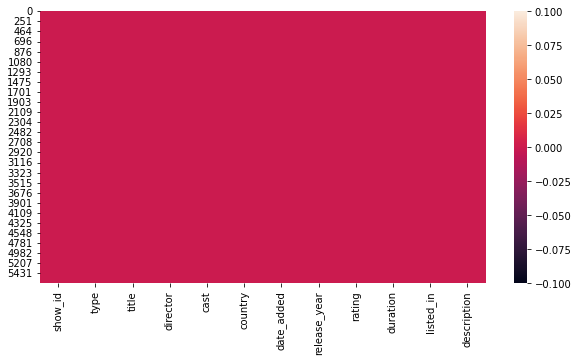

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

Menangani nilai yang hilang:

Dalam data di atas:
*  Saya memilih untuk menghapus kolom 'director' dan 'cast' sepenuhnya karena mereka memiliki volume nilai yang tidak ada

In [ ]:
#df.drop(['director','cast'],axis = 1,inplace = True)
df.drop(['director'],axis = 1,inplace = True)
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


*  Mengisi semua nilai yang hilang di kolom 'negara' dengan Amerika Serikat karena Netflix dibuat di AS

In [ ]:
df['country'].replace(np.nan, 'United States',inplace  = True)

df['cast'].replace(np.nan, 'No Data',inplace  = True)

print(colored(
"I will drop the missing rows from the columns 'date_added' and 'rating' since these have only {} missing rows in total.".
    format(df.isnull().sum().sum()),attrs=['bold']))

I will drop the missing rows from the columns 'date_added' and 'rating' since these have only 21 missing rows in total.


In [ ]:
df.dropna(inplace=True)

print(colored("There are {} rows and {} columns after handling the missing records in the dataset.".format(
    df.shape[0],df.shape[1]),attrs=['bold']))

There are 6214 rows and 11 columns after handling the missing records in the dataset.


In [ ]:
# Checking the Dtype of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 6222
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6214 non-null   int64 
 1   type          6214 non-null   object
 2   title         6214 non-null   object
 3   cast          6214 non-null   object
 4   country       6214 non-null   object
 5   date_added    6214 non-null   object
 6   release_year  6214 non-null   int64 
 7   rating        6214 non-null   object
 8   duration      6214 non-null   object
 9   listed_in     6214 non-null   object
 10  description   6214 non-null   object
dtypes: int64(2), object(9)
memory usage: 582.6+ KB


Datatype kolom 'date_added' adalah objek, mengubahnya menjadi format datetime

In [ ]:
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

# Droping the column 'date_added' as it we have seperate columns for 'year_added' and 'month_added'

df.drop('date_added',axis=1,inplace=True)

In [ ]:
df.head()

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,September,2019
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9,September,2016
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",9,September,2018
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,9,September,2018
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,9,September,2017


### Jenis konten di Netflix:

*   Mari kita cari tahu jenis konten apa yang ada di dataset

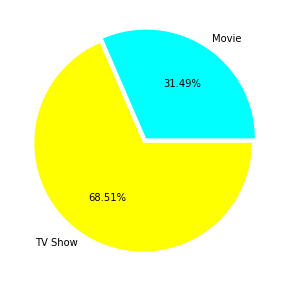

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(df['type'].value_counts().sort_values(),labels=df['type'].value_counts().index,explode=[0.05,0],
        autopct='%1.2f%%',colors=['Cyan','Yellow'])
plt.show()

*   68.51% konten di netflix adalah Acara Tv dan sisanya yaitu 31.49% adalah Film

### 10 negara teratas yang memproduksi konten terbanyak:

Karena ada konten yang diproduksi di berbagai negara sp, kami juga harus mempertimbangkannya. Jadi kita harus membagi baris itu dan mendapatkan negara indivisual.

In [ ]:
from collections import Counter
country_data = df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)

In [ ]:
top10country = country_count.head(10)

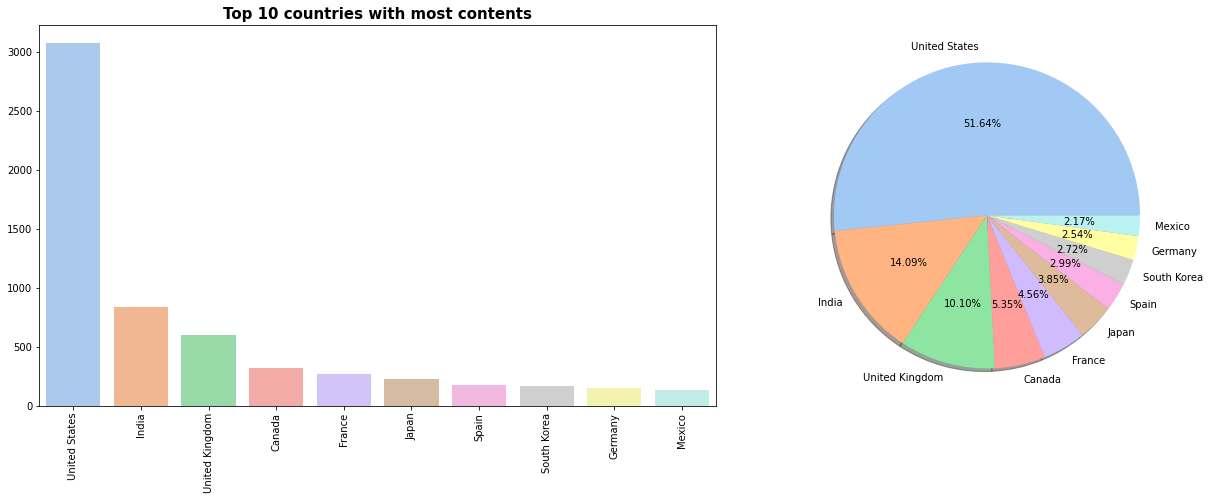

In [ ]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 7))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top10country.index, top10country, ax=ax, palette="pastel")
ax.set_xticklabels(top10country.index, rotation='90')
ax.set_title('Top 10 countries with most contents', fontsize=15, fontweight='bold')

ax2 = plt.subplot(gs[1])
ax2.pie(top10country, labels=top10country.index, shadow=True, startangle=0, colors=sns.color_palette("pastel", n_colors=20),
       autopct='%1.2f%%')
ax2.axis('equal')

plt.show()

* Kita dapat melihat bahwa 10 Negara teratas pemroduksi konten di Nteflix adalah Amerika Serikat, India, Inggris, Kanada, Perancis, jepang, spanyol, Korea Selatan, Jerman dan Mexico

* Dan dari 10 Negara teratas, Amerika Serikat berkontribusi sebesar 51.64% sebagai pemroduksi konten Netflix

### Konten yang ditambahkan sepanjang tahun:

In [ ]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

In [ ]:
df_content = df['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))


df_tv1 = df_tv['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_tv1['percent'] = df_tv1['count'].apply(lambda x : 100*x/sum(df_tv1['count']))


df_movies1 = df_movies['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_movies1['percent'] = df_movies1['count'].apply(lambda x : 100*x/sum(df_movies1['count']))

t1 = go.Scatter(x=df_movies1['year_added'], y=df_movies1["count"], name="Movies", marker=dict(color="#a678de"))
t2 = go.Scatter(x=df_tv1['year_added'], y=df_tv1["count"], name="TV Shows", marker=dict(color="#6ad49b"))
t3 = go.Scatter(x=df_content['year_added'], y=df_content["count"], name="Total Contents", marker=dict(color="brown"))

data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

*   Pertumbuhan jumlah film di netflix jauh lebih tinggi dari acara TV

*   Pertumbuhan konten selalu meningkat mulai dari tahun 2013 hingga 2019

### Konten yang ditambahkan dalam satu tahun :

In [ ]:
df_content = df[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))


df_tv2 = df_tv[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_tv2['percent'] = df_tv2['count'].apply(lambda x : 100*x/sum(df_tv2['count']))


df_movies2 = df_movies[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_movies2['percent'] = df_movies2['count'].apply(lambda x : 100*x/sum(df_movies2['count']))

t1 = go.Scatter(x=df_movies2['month_name_added'], y=df_movies2["count"], name="Movies", marker=dict(color="#a678de"))
t2 = go.Scatter(x=df_tv2['month_name_added'], y=df_tv2["count"], name="TV Shows", marker=dict(color="#6ad49b"))
t3 = go.Scatter(x=df_content['month_name_added'], y=df_content["count"], name="Total Contents", marker=dict(color="Brown"))


data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

*   Dalam satu tahun, pertumbuhan konten di Netflix cenderung meningkat
*   Jumlah konten yang paling sedikit ditambahkan adalah pada bulan Februari

### Hubungan Genre:



1.   Movies Genre:




In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

def relation_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7,
                     cbar_kws={"shrink": 0.6})

    plt.show()

There are 20 types in the Netflix Movie Dataset


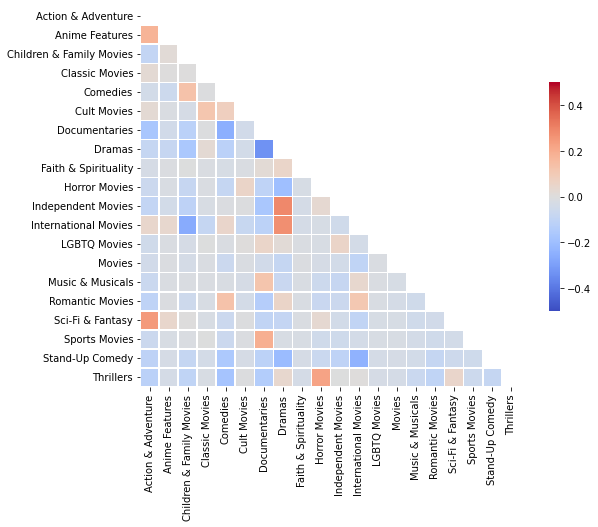

In [ ]:
relation_heatmap(df_movies, 'Movie')

*  Hubungan negatif antara drama dan dokumenter sangat luar biasa. Maka apabila salah satu genre tersebut mengalami peningkatan, maka yang satunya akan mengalami penurunan
*  Apabila film dengan genre Drama meningkat peminatnya, maka genre film yang juga akan mengalami peningkatan adalah Independent Movies dan International Movies. Karena korelasinya positif



2.   Genre acara TV_:



There are 22 types in the Netflix TV Show Dataset


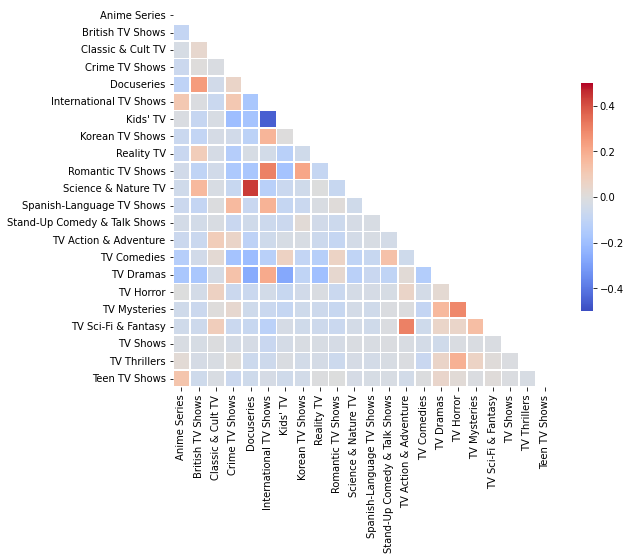

In [ ]:
relation_heatmap(df_tv, 'TV Show')

*  Hubungan negatif antara *TV anak-anak* dan *Acara TV Internasional* sangat luar biasa. Maka apabila salah satu genre tersebut mengalami peningkatan, maka yang satunya akan mengalami penurunan
*  Ada korelasi positif yang kuat antara *Science & Natural* dan *Docuseries* . Maka apabila salah satu genre tersebut mengalami peningkatan, maka yang satunya juga akan mengalami hal yang sama

### Distribusi peringkat:

In [ ]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  ['G', 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']

In [ ]:
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)

In [ ]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()



1.   Peringkat Film:




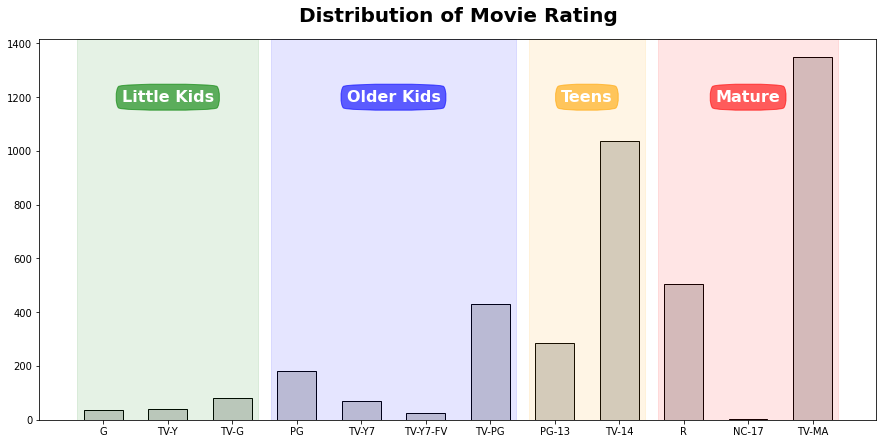

In [ ]:
rating_barplot(movie_rating,'Movie', 1200)




2.   Peringkat TV:



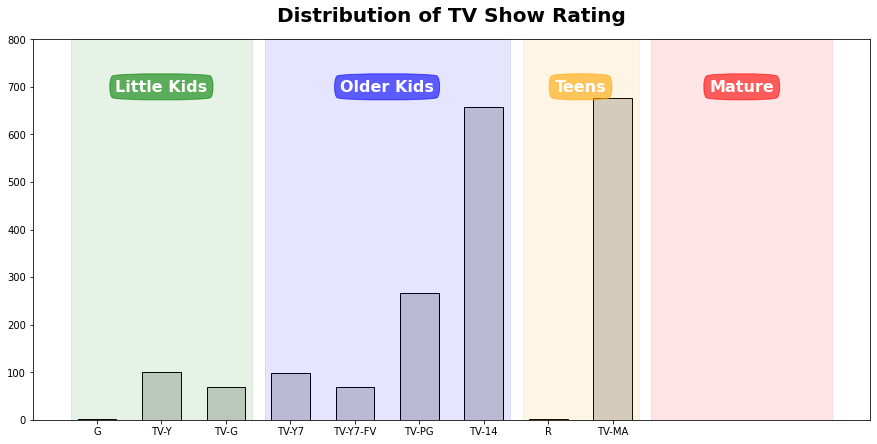

In [ ]:
rating_barplot(tv_rating,'TV Show' , 700, 800)

*   Dari plotnya kita dapat mengatakan bahwa Acara TV lebih banyak diminati Anak - Anak dibandingkan Film. Sedangkan Film lebih diminati oleh orang dewasa

### Distribusi durasi Film:

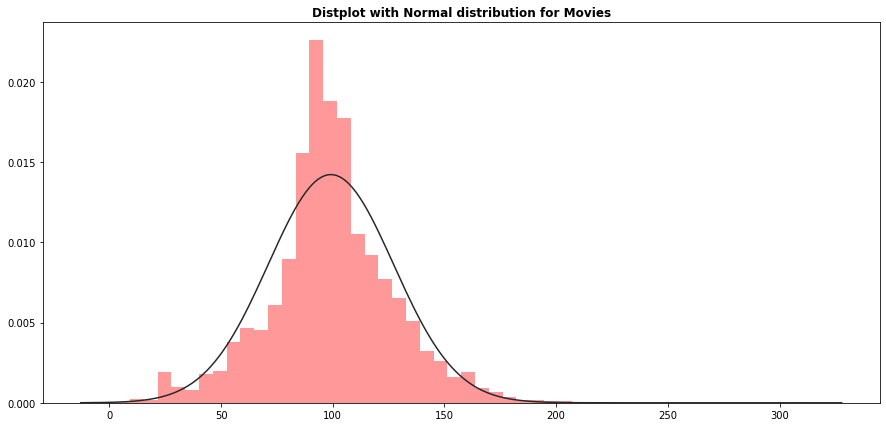

In [ ]:
from scipy.stats import norm

plt.figure(figsize=(15,7))
sns.distplot(df_movies['duration'].str.extract('(\d+)'),fit=norm,kde=False,color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

Dari plot di atas kita dapat mengatakan bahwa sebagian besar film memiliki durasi mulai dari 85 menit hingga 120 menit.

### Distribusi untuk TV_shows:

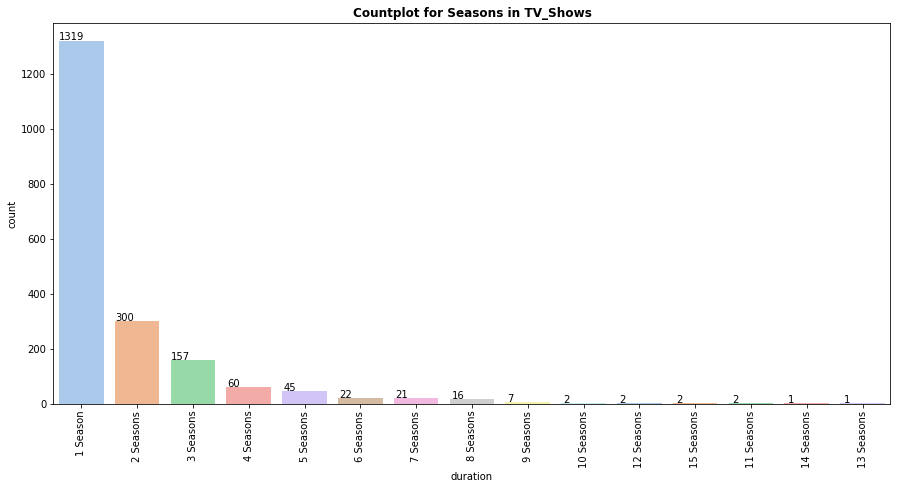

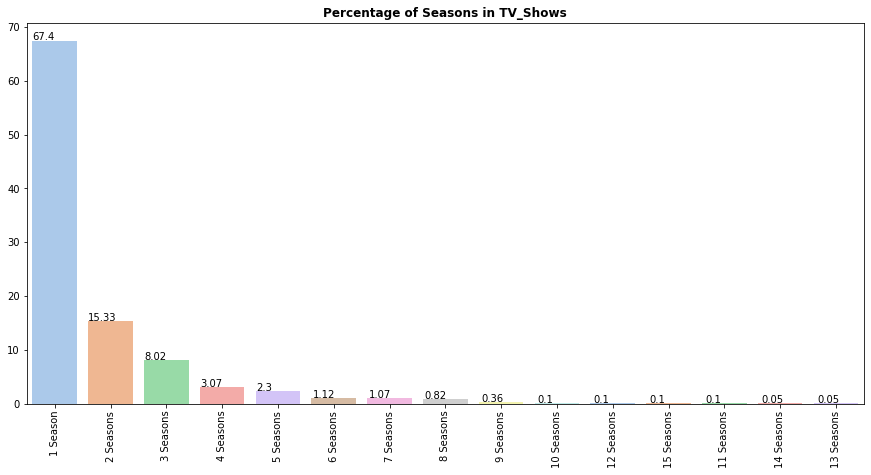

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df_tv['duration'],order = df_tv['duration'].value_counts().index,palette="pastel")
plt.title('Countplot for Seasons in TV_Shows',fontweight="bold")
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, (p.get_height() * 1.005)))

plt.figure(figsize=(15,7))
ax = sns.barplot(x=((df_tv['duration'].value_counts()/df_tv.shape[0])*100).index,
                 y=round(((df_tv['duration'].value_counts()/df_tv.shape[0])*100),2).values,
                 palette="pastel")
plt.title('Percentage of Seasons in TV_Shows',fontweight="bold")
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, (p.get_height() * 1.005)))
plt.show()

Dari plot di atas kita dapat mengatakan bahwa :
1. 67.4% dari Acara Tv berakhir setelah menyelesaikan Musim pertama (Season 1)
2. 15.3% Acara Tv berakhir saat Musim ke-dua (Season 2)
3. Dan 8.04% dari Acara TV berakhir  pada Musim ke 3 (Season 3)

### 10 Genre Film dan Acara TV Teratas:

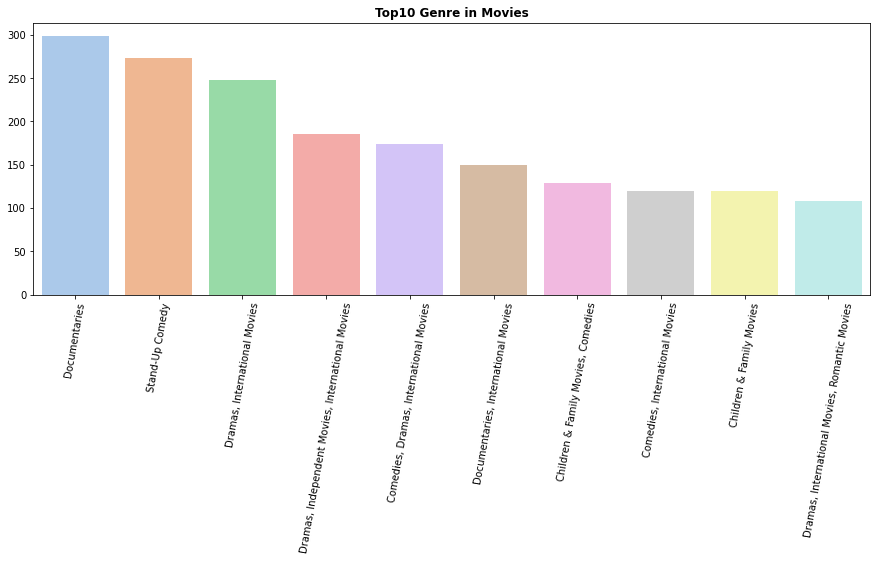

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="pastel")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

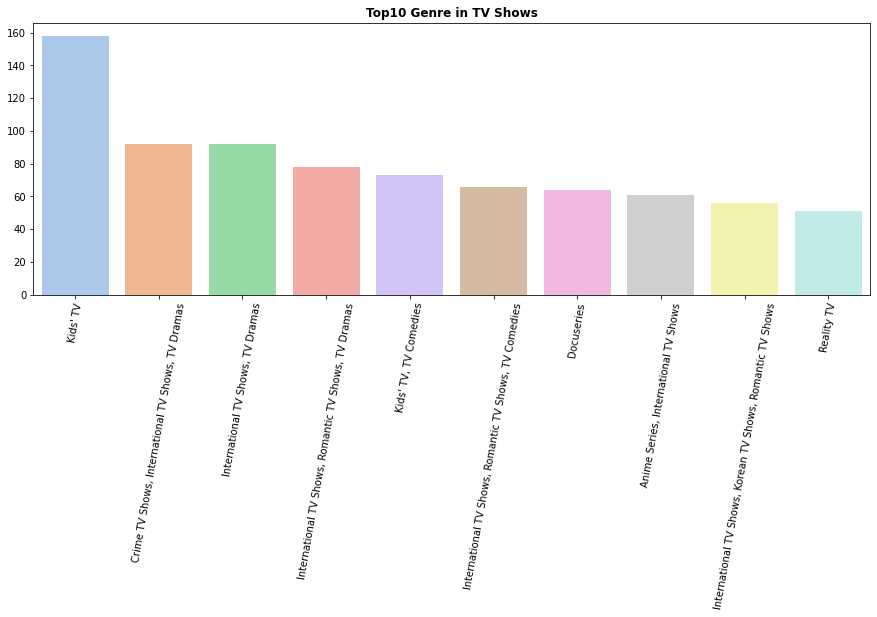

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="pastel")
plt.xticks(rotation=80)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

### 20 artis teratas yang hadir di Netflix:

In [ ]:
df['cast_name'] = df['cast'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
cast_count = []
for i in df['cast_name']: cast_count += i

cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]

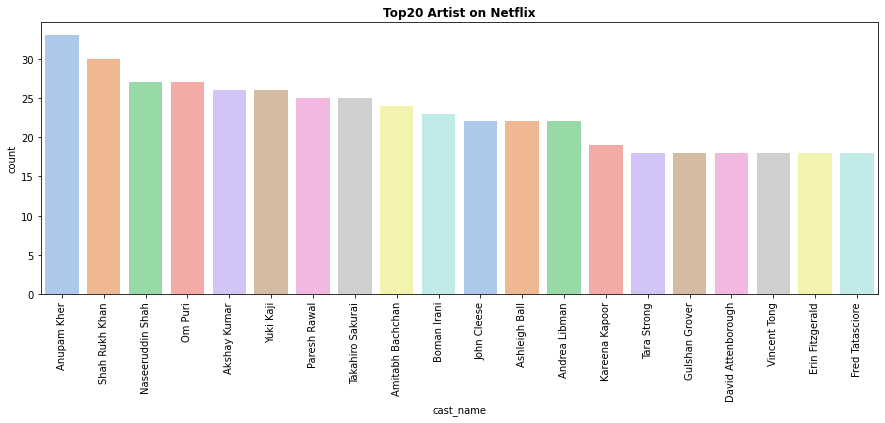

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="pastel")
plt.title("Top20 Artist on Netflix",fontweight="bold")
plt.xticks(rotation=90)
plt.show()

*   Lima artis teratas berasal dari India